### Implementing CNN on the extracted MFCC dataset

#### Data preprocessing

In [2]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.load("dataset_mfcc.npy",allow_pickle= True))
data.columns = ['feature', 'label']

from sklearn.preprocessing import LabelEncoder

X = np.array(data.feature.tolist())
y = np.array(data.label.tolist())
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,y)
lb = LabelEncoder()

from keras.utils import np_utils

y = np_utils.to_categorical(lb.fit_transform(y))
val_y = np_utils.to_categorical(lb.fit_transform(val_y))

#### Building the model

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 



num_labels = y.shape[1]
filter_size = 3



# build model
model = Sequential()


model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

2022-05-25 14:05:21.282524: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20992     
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [8]:
model.fit(X, y, batch_size=64, epochs=64, validation_data=(val_x, val_y))

Epoch 1/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6651 - accuracy: 0.7745 - val_loss: 0.5482 - val_accuracy: 0.8424
Epoch 2/64
103/103 [==============================] - 1s 6ms/step - loss: 0.6672 - accuracy: 0.7714 - val_loss: 0.5337 - val_accuracy: 0.8543
Epoch 3/64
103/103 [==============================] - 1s 5ms/step - loss: 0.6270 - accuracy: 0.7827 - val_loss: 0.5311 - val_accuracy: 0.8511
Epoch 4/64
103/103 [==============================] - 1s 7ms/step - loss: 0.6222 - accuracy: 0.7847 - val_loss: 0.5188 - val_accuracy: 0.8484
Epoch 5/64
103/103 [==============================] - 1s 6ms/step - loss: 0.6101 - accuracy: 0.7940 - val_loss: 0.5117 - val_accuracy: 0.8461
Epoch 6/64
103/103 [==============================] - 1s 6ms/step - loss: 0.6176 - accuracy: 0.7907 - val_loss: 0.5150 - val_accuracy: 0.8493
Epoch 7/64
103/103 [==============================] - 1s 5ms/step - loss: 0.5968 - accuracy: 0.7926 - val_loss: 0.5095 - val_accuracy: 0.8484
Epoch 

103/103 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.8775 - val_loss: 0.3674 - val_accuracy: 0.8969
Epoch 59/64
103/103 [==============================] - 0s 5ms/step - loss: 0.3820 - accuracy: 0.8667 - val_loss: 0.3703 - val_accuracy: 0.8969
Epoch 60/64
103/103 [==============================] - 0s 4ms/step - loss: 0.3552 - accuracy: 0.8803 - val_loss: 0.3835 - val_accuracy: 0.8988
Epoch 61/64
103/103 [==============================] - 0s 5ms/step - loss: 0.3457 - accuracy: 0.8844 - val_loss: 0.3748 - val_accuracy: 0.9015
Epoch 62/64
103/103 [==============================] - 1s 5ms/step - loss: 0.3415 - accuracy: 0.8778 - val_loss: 0.3714 - val_accuracy: 0.9047
Epoch 63/64
103/103 [==============================] - 0s 5ms/step - loss: 0.3543 - accuracy: 0.8739 - val_loss: 0.3805 - val_accuracy: 0.9011
Epoch 64/64
103/103 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.8789 - val_loss: 0.3526 - val_accuracy: 0.9107


### Implementing XGBOOST Algorithm on the same Dataset

In [9]:
train = np.argmax(y,axis =  1)

In [10]:
train.shape

(6549,)

In [11]:
test = np.argmax(val_y,axis =  1)

In [12]:
test.shape

(2183,)

In [13]:
x =X
X.shape

(6549, 40)

In [14]:
test_x = val_x

In [15]:
from xgboost import XGBClassifier

In [16]:
model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=280, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=60)

In [17]:
model.fit(x,train)

XGBClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=280, nthread=4,
              objective='multi:softprob', seed=60, subsample=0.8)

In [18]:
pred = model.predict(test_x)

In [19]:
pred

array([1, 7, 2, ..., 6, 0, 2])

In [21]:
test

array([1, 7, 8, ..., 6, 0, 2])

In [22]:
import sklearn.metrics as met
met.accuracy_score(test, pred)

0.9033440219880898

In [23]:
met.confusion_matrix(test, pred)

array([[253,   0,   2,   0,   1,   1,   0,   1,   0,   3],
       [  0,  99,   1,   0,   2,   3,   1,   0,   0,   7],
       [  1,   1, 216,  10,   1,   1,   0,   0,   0,   9],
       [  1,   2,  15, 197,   3,   1,   4,   0,   4,   9],
       [  2,   0,   1,   3, 220,   1,   0,  13,   0,   5],
       [  1,   0,   2,   0,   1, 238,   0,   0,   0,   2],
       [  0,   0,   8,  13,   1,   0,  79,   0,   0,   3],
       [  0,   0,   0,   0,   6,   0,   0, 240,   0,   2],
       [  1,   0,  10,   4,   0,   1,   0,   0, 230,   0],
       [  2,   1,  22,   6,   5,   1,   0,   3,   7, 200]])

### Implementing Random Forest on the same dataset

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
from pip._internal import main
main(["install","progressbar"])
import progressbar
import time

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [26]:
score = []
l = [i for i in range(50,300,25)]
for i in range(50,300,25):
  model = RandomForestClassifier(n_estimators=i ,criterion = "entropy", bootstrap= False)
  model.fit(x,train)
  pred = model.predict(test_x)
  score.append(met.accuracy_score(test, pred))

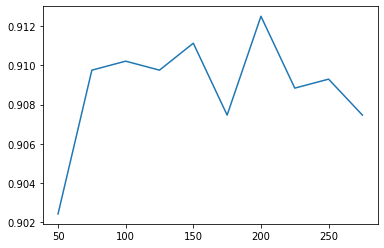

In [27]:
from matplotlib import pyplot as plt
plt.plot(l,score)
plt.show()